## Exploratory Data Analysis of IMDb dataset
* Data sets found at https://datasets.imdbws.com/
* Description of datasets found here imdb.com/interfaces


In [192]:
import re
from io import StringIO 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import chisquare

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

## Statistics for titles.ratings.tsv


Sample of titles.ratings.tsv dataset: 

 <bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1910
1        tt0000002            5.8       256
2        tt0000003            6.5      1712
3        tt0000004            5.6       169
4        tt0000005            6.2      2527
...            ...            ...       ...
1259468  tt9916690            6.5         6
1259469  tt9916720            5.1       253
1259470  tt9916730            8.4         6
1259471  tt9916766            6.8        21
1259472  tt9916778            7.2        35

[1259473 rows x 3 columns]>

Statistics for titles.ratings.tsv: 

       averageRating    numVotes
count    1259473.00  1259473.00
mean           6.91     1015.15
std            1.39    17009.92
min            1.00        5.00
25%            6.20       11.00
50%            7.10       25.00
75%            7.80       96.00
max           10.00  2636714.00


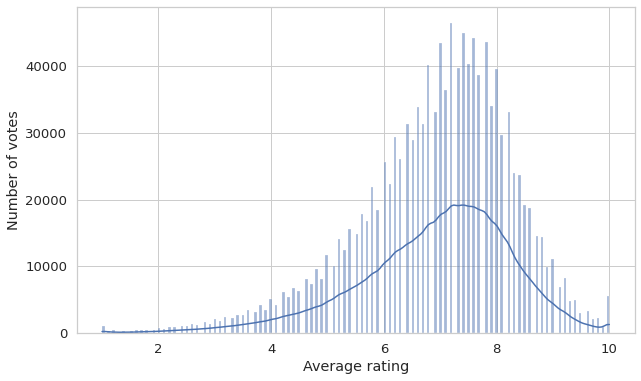

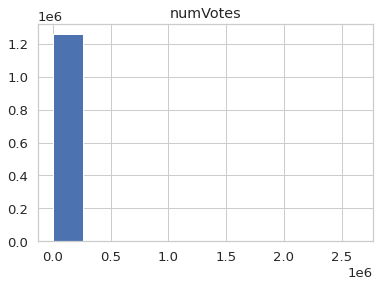

mode is:     averageRating  numVotes
0            7.2         7 


mean is:  averageRating       6.907232
numVotes         1015.148084
dtype: float64 




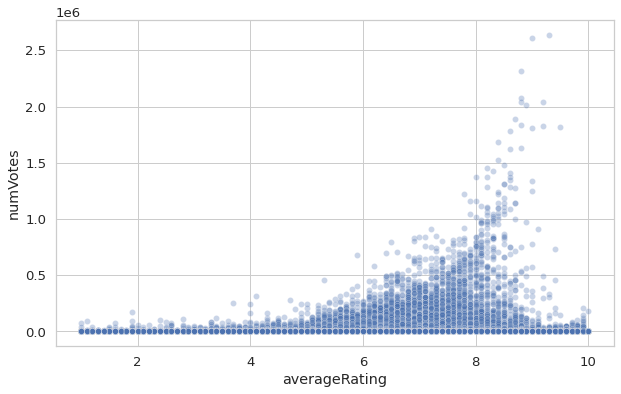

In [75]:
filename = 'data/imdb/title.ratings.tsv'
df_rating = pd.read_csv(filename, sep='\t')

print("\nSample of titles.ratings.tsv dataset: \n\n", df_rating.head)


# This shows percentiles, mean, sd, min, max and format to show 2 dec places
print("\nStatistics for titles.ratings.tsv: \n\n", df_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

# This shows no missing values
#print("df_rating.insnull().sum() : ", df_rating.isnull().sum())

#print("df_rating.memory_usage() : ", df_rating.memory_usage())


# Create basic histogram
fig = plt.figure(figsize=(10, 6))

# df_rating.hist(column='averageRating', bins=200)
sns.histplot(data=df_rating, x='averageRating', bins=200, kde=True)
plt.xlabel('Average rating')
plt.ylabel('Number of votes')
plt.show()

# trying to plot numVotes as a histogram doesn't really show well. --> FIX THIS!
df_rating.hist(column='numVotes')
plt.show()

# find mode of averageRating
print("mode is: ", df_rating.mode(numeric_only=True), "\n\n")

# find mean of averageRating
print("mean is: ", df_rating.mean(numeric_only=True), "\n\n")

# find top 20 movies by num of ratings
df_rating.nlargest(20, 'numVotes')

# Scatter plot of averageRating vs numVotes
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rating, x='averageRating', y='numVotes', alpha=0.3)
# df_rating.plot(title="Scatter plot of rating vs num ratings", kind='scatter', x ='averageRating', y='numVotes')

plt.show()


## Statistics for names.basics.tsv


Sample of names.basics.tsv dataset: 

 <bound method NDFrame.head of              nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
11906868  nm9993714   Romeo del Rosario        \N        \N   
11906869  nm9993716       Essias Loberg        \N        \N   
11906870  nm9993717  Harikrishnan Rajan        \N        \N   
11906871  nm9993718         Aayush Nair        \N        \N   
11906872  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtra

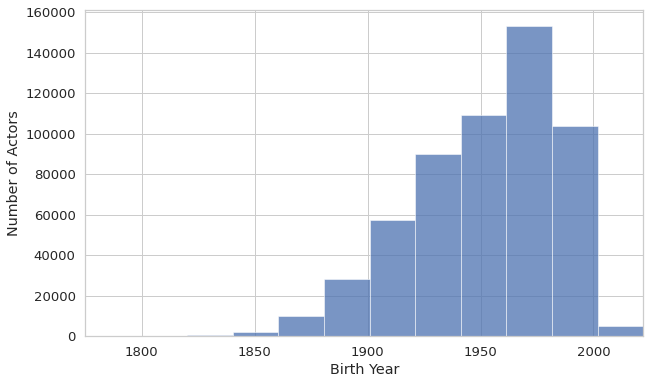

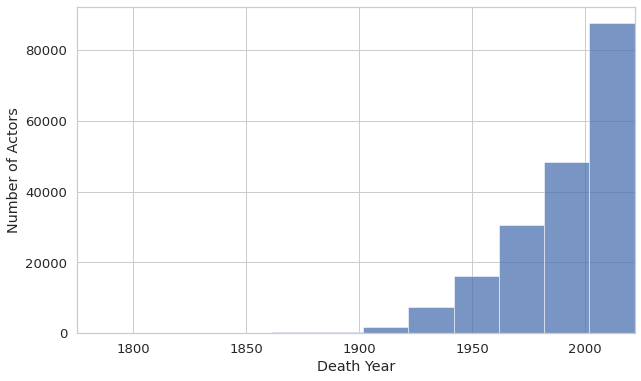

In [24]:
filename = 'data/imdb/name.basics.tsv'

df1 = pd.read_csv(filename, sep='\t')

print("\nSample of names.basics.tsv dataset: \n\n", df1.head)

print("\nStatistics for titles.ratings.tsv: \n\n", df1.describe())

# drop rows where birthYear is /N
df1.drop(df1[df1['birthYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['birthYear'])
# Make histogram of actor birthYear
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df2, bins=100)
# df2.hist(bins=100)
plt.xlabel('Birth Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()


# drop rows where deathYear is /N
df1.drop(df1[df1['deathYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['deathYear'])
# Make histogram of actor deathYear
fig = plt.figure(figsize=(10, 6))
# df2.hist(bins=100)
sns.histplot(data=df2, bins=100)
plt.xlabel('Death Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()

## Statistics for title.basics.tsv


Sample of title.basics.tsv dataset: 

       tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  

Statistics for titles.basics.tsv: 

 count    2.431586e+06
mean     2.003177e+03
std    

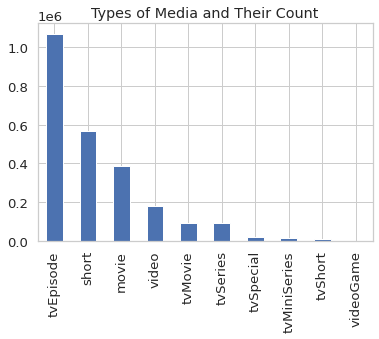

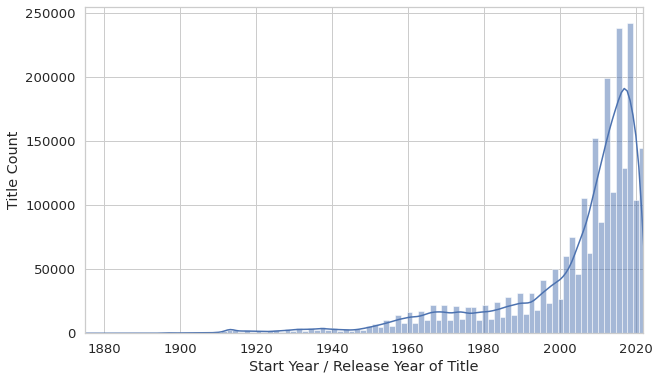

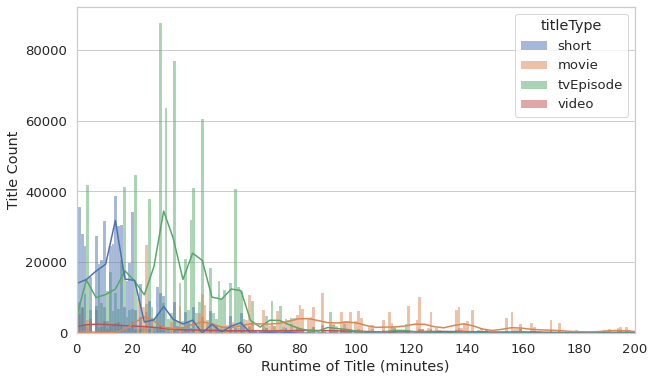


Statistics for titleruntime: 

 count     2203880
unique        690
top            30
freq       101474
Name: runtimeMinutes, dtype: object


In [72]:
# show dataset size, do a pie chart on the media types, 
# do a kde plot on movie year, etc. 
# pattern metching will use regex: "^tt[0-9]*\t(movie|short|tvSeries|tvShort|tvMovie|tvSpecial|tvMiniSeries)\t"
filename = 'data/imdb/title.basics.tsv'

stream = StringIO()
header = True # We want the first line always
with open(filename, "r") as file:
    patrn = "^tt[0-9]*\t(movie|short|tvSeries|tvShort|tvMovie|tvSpecial|tvMiniSeries)\t"
    for line in file:
        if re.search(patrn, line) or header:
            stream.write(line)
            header = False
stream.seek(0)
imdb = pd.read_csv(stream,
                   sep='\t',
                   header=0)
imdb = imdb[imdb.startYear.apply(lambda x: x.isnumeric())].dropna(subset='startYear', inplace=False)
imdb["endYear"] = imdb.endYear.apply(lambda x: x if x.isnumeric() else np.nan)
imdb['endYear'] = imdb['endYear'].astype("Int64")
imdb['startYear'] = imdb['startYear'].astype("Int64")
stream.close()
file.close()

print("\nSample of title.basics.tsv dataset: \n\n", df.head())

print("\nStatistics for titles.basics.tsv: \n\n", df1.describe())

# Piechart is commented out because it looks bad. Use barchart below
#df['titleType'].value_counts().plot(ax=ax, kind='pie')

fig, ax = plt.subplots()
df['titleType'].value_counts().plot(title='Types of Media and Their Count',ax=ax, kind='bar')


# Prep startYear column to make a histogram and a KDE plot
# drop rows where startYear is /N
df.drop(df[df['startYear'] == r'\N'].index, inplace = True)
# convert startYear column from type object to type numeric. df1 is 1 column.
df1 = pd.to_numeric(df['startYear'])
# Make histogram of startYear
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df1, bins=100, kde=True)
# df1.hist(bins=100)
plt.xlabel('Start Year / Release Year of Title')
plt.ylabel('Title Count')
plt.xlim([1875, 2022])
plt.show()

# Prep runtimeMinutes column to make a histogram and a KDE plot
# drop rows where runtimeMinutes is /N
df.drop(df[df['runtimeMinutes'] == r'\N'].index, inplace = True)
# convert runtimeMinutes column from type object to type numeric. df2 is 1 column.
df2 = df[df['titleType'].isin(['tvEpisode', 'short', 'movie', 'video'])][['runtimeMinutes', 'titleType']]
# Make histogram of runtimeMinutes
fig = plt.figure(figsize=(10, 6))
hplot = sns.histplot(x=df2['runtimeMinutes'], bins=10, kde=True, hue=df2['titleType'])
hplot.xaxis.set_major_locator(ticker.MultipleLocator(20))
hplot.xaxis.set_major_formatter(ticker.ScalarFormatter())
hplot.xaxis.grid(False)
plt.xlabel('Runtime of Title (minutes)')
plt.ylabel('Title Count')
plt.xlim([0, 200])
plt.show()

print("\nStatistics for titleruntime: \n\n", df2['runtimeMinutes'].describe())

##  Correlation Between Year and Rating, and Genre and Rating:

In [73]:
del(df1, df2) # free up memory

In [74]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [76]:
df_rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1910
1,tt0000002,5.8,256
2,tt0000003,6.5,1712
3,tt0000004,5.6,169
4,tt0000005,6.2,2527


In [77]:
df_rating = df_rating.merge(right=df, on='tconst')

In [78]:
df_rating.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1910,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.8,256,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1712,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,5.6,169,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2527,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [101]:
df_rating = df_rating[~(df_rating['genres'] == '\\N')]

In [105]:
## Checking freq of genres - we want to remove genres that aren't frequent:
freq_genre = {}
genres = df_rating['genres']
# Get frequency dict
for genre in genres:
    glist = genre.split(',')
    for g in glist:
        if freq_genre.get(g) is None:
            freq_genre[g] = 1
        else:
            freq_genre[g] += 1
conf = 0.01*len(df_rating) # confidence level: genres need to be in at least 1% of movies
delete = []
for key, value in freq_genre.items():
    if value < conf:
        delete += [key]
print(f'Number of genres that are not frequent enough: {len(delete)}/{len(freq_genre.items())}')
print(delete)

Number of genres that are not frequent enough: 2/28
['News', 'Film-Noir']


In [189]:
## Explode the genre column
def explode_genre(row, exclude):
    rows = []
    genres = row[-1].split(',')
    for genre in genres:
        if genre not in exclude:
            new_row = row
            new_row = np.append(new_row, [genre])
            rows += [new_row]
    return rows

def explode(df, exclude):
    new_df = []
    print('[', end='')
    n = len(df)
    for i in range(n):
        row = df.iloc[i].to_numpy()
        new_df += explode_genre(row, exclude)
        if(i%(len(df)//10) == 0):
            print('|', end='')
    print(f'] Done\tnew_length={len(new_df)}')
    return new_df

exp_npy = explode(df_rating, delete)
exp_df = pd.DataFrame(exp_npy, columns=list(df_rating.columns) + ['genre_exp'])
exp_df.head()

[|||||||||||] Done	new_length=1796671


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre_exp
0,tt0000001,5.7,1910,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Documentary
1,tt0000001,5.7,1910,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Short
2,tt0000002,5.8,256,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Animation
3,tt0000002,5.8,256,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Short
4,tt0000003,6.5,1712,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Animation


In [190]:
exp_df[corr_vals].head()

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genre_exp
0,5.7,1910,short,0,1894,1,Documentary
1,5.7,1910,short,0,1894,1,Short
2,5.8,256,short,0,1892,5,Animation
3,5.8,256,short,0,1892,5,Short
4,6.5,1712,short,0,1892,4,Animation


In [382]:
## Remove movies with too few reviews (unpopular movies)
movie_thresh = 500000#round(exp_df['numVotes'].quantile(0.75))
drop_movies = exp_df[exp_df['numVotes'] < movie_thresh]['tconst']
print(f'Movies to drop: {len(drop_movies)}')

Movies to drop: 1795891


In [383]:
## Choosing correlation attributes to observe
corr_vals = ['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genre_exp']

In [384]:
## Applying factorization to categorical attributes and making continuous attributes numeric
df = exp_df[~exp_df['tconst'].isin(drop_movies)]
# Continuous
cont = ['averageRating', 'numVotes', 'startYear', 'runtimeMinutes']
df['startYear'] = df['startYear'].astype('int')
df['runtimeMinutes'] = df['runtimeMinutes'].astype('int')
# Categorical
cat = ['titleType', 'isAdult', 'genre_exp']
type_ohe = pd.get_dummies(df['titleType'], prefix='type')
genre_ohe = pd.get_dummies(df['genre_exp'], prefix='genre')

# Make sure isAdult has only two values
df['isAdult'].astype('int')

new_df = df.join(type_ohe)
new_df = new_df.join(genre_ohe)
genre_att = [i for i in new_df.columns if 'genre_' in i]
type_att = [i for i in new_df.columns if 'type_' in i]
del(df)

/tmp/ipykernel_227591/154315802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startYear'] = df['startYear'].astype('int')
/tmp/ipykernel_227591/154315802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtimeMinutes'] = df['runtimeMinutes'].astype('int')


In [385]:
new_df.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
31540,tt0034583,8.5,566558,movie,Casablanca,Casablanca,0,1942,\N,102,...,0,0,0,0,0,0,0,0,0,0
31541,tt0034583,8.5,566558,movie,Casablanca,Casablanca,0,1942,\N,102,...,0,0,0,0,1,0,0,0,0,0
31542,tt0034583,8.5,566558,movie,Casablanca,Casablanca,0,1942,\N,102,...,0,0,0,0,0,0,0,0,1,0
55694,tt0050083,9.0,778482,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,...,0,0,0,0,0,0,0,0,0,0
55695,tt0050083,9.0,778482,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,...,0,0,0,0,0,0,0,0,0,0


In [386]:
type_att

['type_movie', 'type_tvMiniSeries', 'type_tvSeries']

In [387]:
exp_df[corr_vals].head()

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genre_exp
0,5.7,1910,short,0,1894,1,Documentary
1,5.7,1910,short,0,1894,1,Short
2,5.8,256,short,0,1892,5,Animation
3,5.8,256,short,0,1892,5,Short
4,6.5,1712,short,0,1892,4,Animation



Basic Correlation Matrix
                 averageRating  numVotes  startYear  runtimeMinutes
averageRating        1.000000  0.547522  -0.349861       -0.014198
numVotes             0.547522  1.000000  -0.161803        0.193053
startYear           -0.349861 -0.161803   1.000000        0.026214
runtimeMinutes      -0.014198  0.193053   0.026214        1.000000


SeaBorn Correlation Matrix as Heatmap


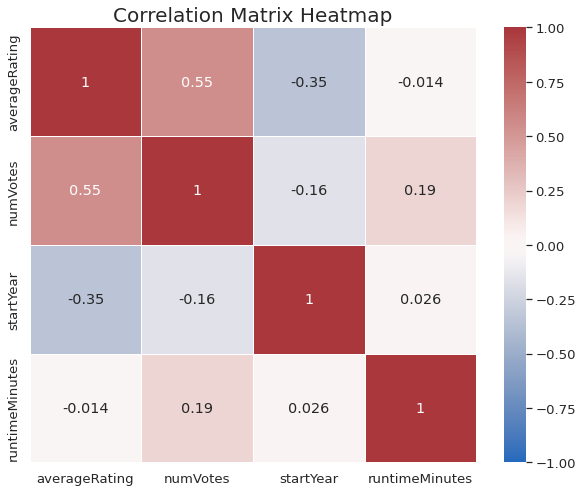

In [388]:
# Print basic correlation matrix
matrix = new_df[cont].corr()
print("\nBasic Correlation Matrix\n", matrix)

# Used https://datagy.io/python-correlation-matrix/ as a reference on 11/26/2022
print("\n\nSeaBorn Correlation Matrix as Heatmap")
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', linewidths=.5, ax=ax) 
plt.title("Correlation Matrix Heatmap", fontsize =20)
plt.show()


##  Observing trends in genre and type:

In [381]:
mean_val, std_val = new_df[new_df[type_att[0]] == 1]['averageRating'].agg(['mean', 'std'])
std_val

1.2476874233240949

Showing 10 plots: ..........

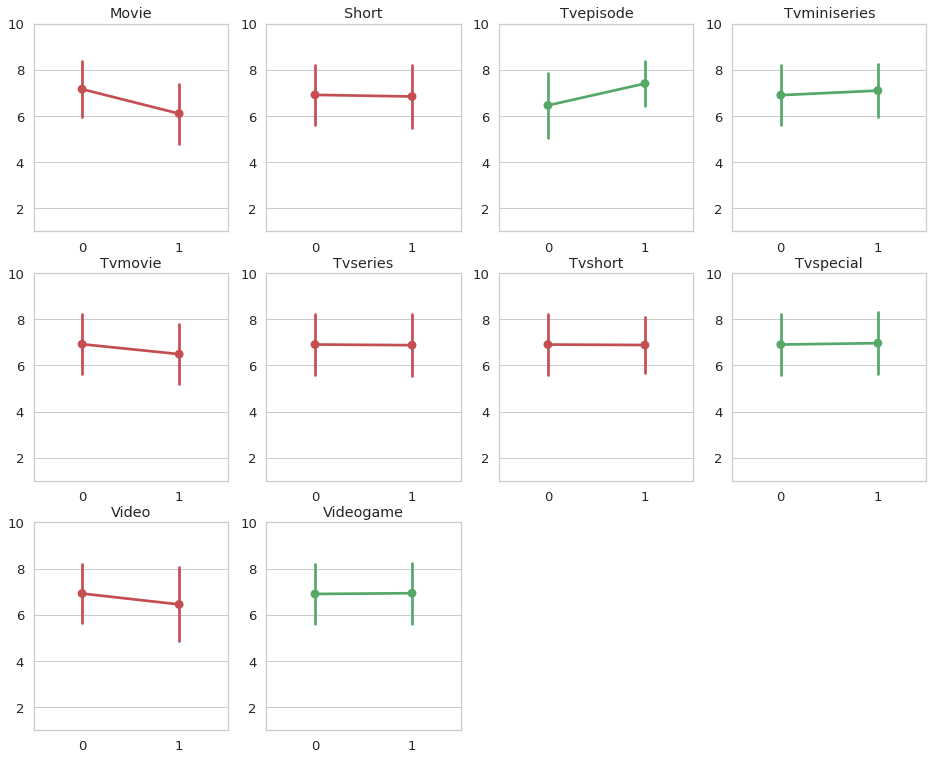

In [277]:
fig = plt.figure(figsize=(16, 13))
n = 1
l = len(type_att)
min_rating = new_df['averageRating'].min()
max_rating = new_df['averageRating'].max()
print(f'Showing {l} plots:', end=' ')
for ft in type_att:  
    ax = fig.add_subplot(int(l/4)+1, 4, n)
    mean_val_p, std_val_p = new_df[new_df[ft] == 1]['averageRating'].agg(['mean', 'std'])
    mean_val_n, std_val_n = new_df[new_df[ft] == 0]['averageRating'].agg(['mean', 'std'])
    if(mean_val_n < mean_val_p):
        c = 'g'
    elif(mean_val_n > mean_val_p):
        c = 'r'
    else:
        c = 'k'
    sns.pointplot(data = new_df, x=ft, y='averageRating', ci='sd', color=c)
    print('.', end='') # visual feedback to know progress
    n+=1
    plt.ylim([min_rating, max_rating])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(ft.replace('type_', '').capitalize())
    

Showing 25 plots: .........................

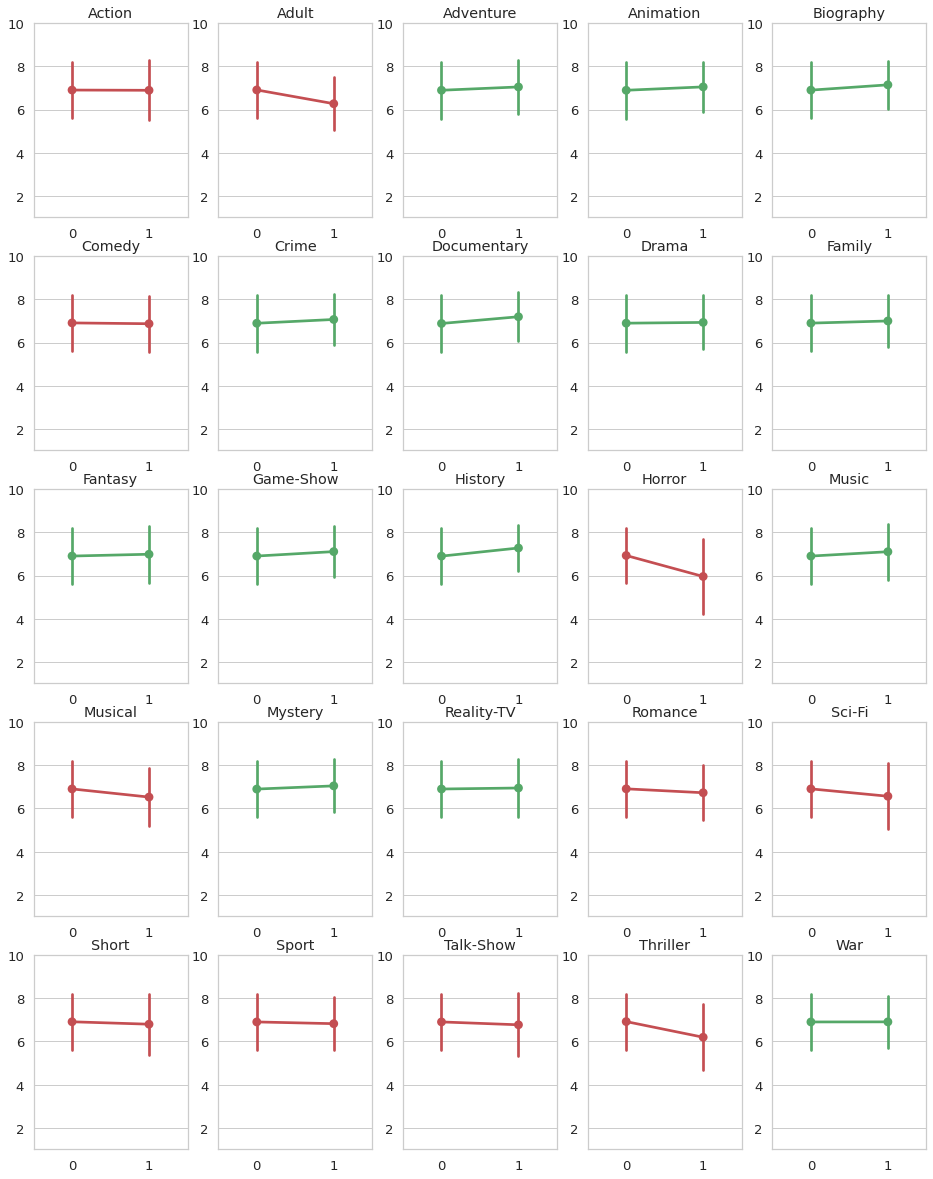

In [279]:
fig = plt.figure(figsize=(16, 25))
n = 1
l = len(genre_att[1:-1])
min_rating = new_df['averageRating'].min()
max_rating = new_df['averageRating'].max()
print(f'Showing {l} plots:', end=' ')
for ft in genre_att[1:-1]:  
    ax = fig.add_subplot(int(l/5)+1, 5, n)
    mean_val_p, std_val_p = new_df[new_df[ft] == 1]['averageRating'].agg(['mean', 'std'])
    mean_val_n, std_val_n = new_df[new_df[ft] == 0]['averageRating'].agg(['mean', 'std'])
    if(mean_val_n < mean_val_p):
        c = 'g'
    elif(mean_val_n > mean_val_p):
        c = 'r'
    else:
        c = 'k'
    sns.pointplot(data = new_df, x=ft, y='averageRating', ci='sd', color=c)
    print('.', end='') # visual feedback to know progress
    n+=1
    plt.ylim([min_rating, max_rating])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(ft.replace('genre_', ''))

Showing 25 plots: .........................

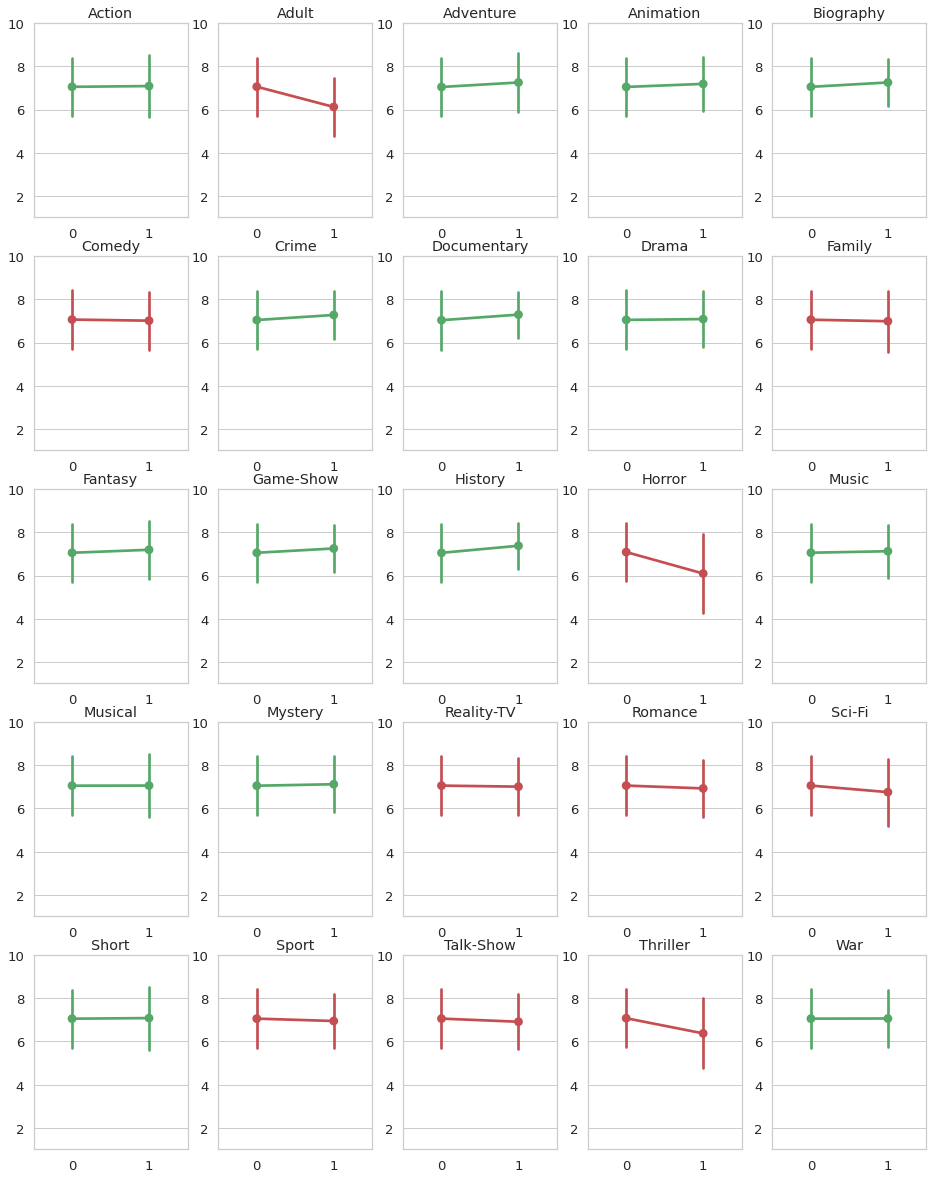

In [289]:
recent_df = new_df[new_df['startYear'] >= 2010]
fig = plt.figure(figsize=(16, 25))
n = 1
l = len(genre_att[1:-1])
min_rating = recent_df['averageRating'].min()
max_rating = recent_df['averageRating'].max()
print(f'Showing {l} plots:', end=' ')
for ft in genre_att[1:-1]:  
    ax = fig.add_subplot(int(l/5)+1, 5, n)
    mean_val_p, std_val_p = recent_df[recent_df[ft] == 1]['averageRating'].agg(['mean', 'std'])
    mean_val_n, std_val_n = recent_df[recent_df[ft] == 0]['averageRating'].agg(['mean', 'std'])
    if(mean_val_n < mean_val_p):
        c = 'g'
    elif(mean_val_n > mean_val_p):
        c = 'r'
    else:
        c = 'k'
    sns.pointplot(data = recent_df, x=ft, y='averageRating', ci='sd', color=c)
    print('.', end='') # visual feedback to know progress
    n+=1
    plt.ylim([min_rating, max_rating])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(ft.replace('genre_', ''))